In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

start = dt.datetime(2021,1,1)
end = dt.datetime(2022,3,1)

data = yf.download('TSLA', interval='1d', start='2021-01-01')
data['Adj Close'].plot(figsize=(12,7))
plt.title('TSLA Adjusted Closing Prices')
plt.ylabel('Price ($USD)')
plt.grid()
plt.show();

#### Exponential Moving Average Crossover Signals
- EMA[Today] = (A * Close price[Today]) + ((1-A) * EMA(Yesterday))
    - where A = 2/(N+1), i.e. the Smoothing factor
    - where N = length of the window (mA period)
- pandas contains the `.ewm` method

[*********************100%***********************]  1 of 1 completed


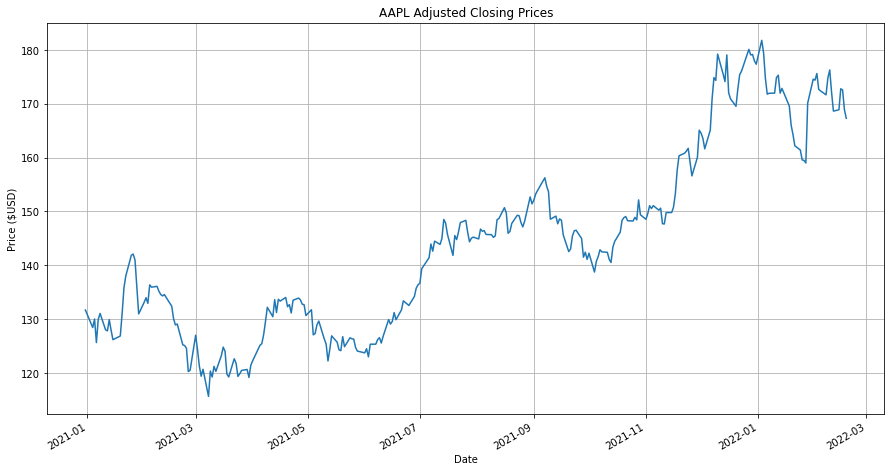

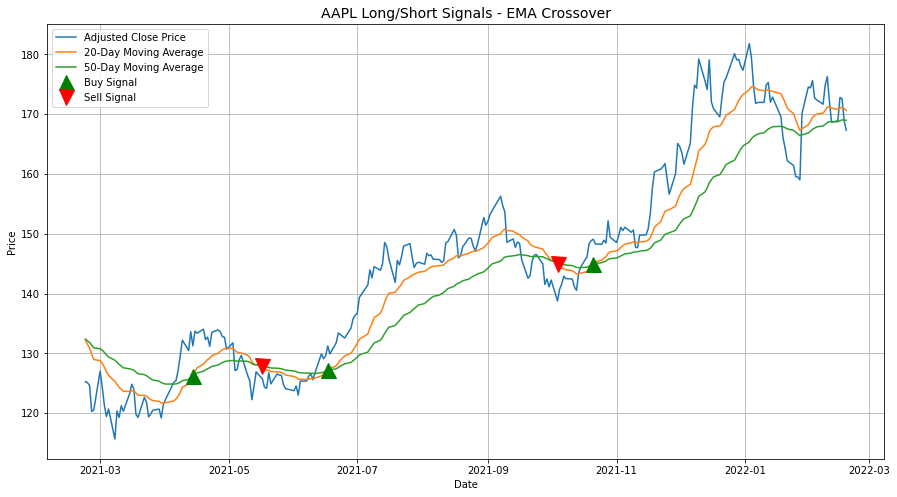

In [4]:
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,3,1)

data2 = yf.download('AAPL', interval='1d', start='2021-01-01')
data2['Adj Close'].plot(figsize=(15,8))
plt.title('AAPL Adjusted Closing Prices')
plt.ylabel('Price ($USD)')
plt.grid()
plt.show();


data2['20mA'] = data2['Adj Close'].ewm(span = 20, adjust=False).mean()
data2['50mA'] = data2['Adj Close'].ewm(span = 50, adjust=False).mean()

data2['Signal'] = 0
data2['Long Signal'] = np.where(data2['20mA'] > data2['50mA'], 1, 0)
data2['Short Signal'] = np.where(data2['20mA'] < data2['50mA'], -1, 0)

data2['Position'] = data2['Signal'].diff()


# Plot adj closing prices and moving averages
plot_data2 = data2[-253:]

# Setting figure size & headers
plt.figure(figsize=(15,8))
plt.title('AAPL Long/Short Signals - EMA Crossover', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting the legend labels
plt.plot(plot_data2['Adj Close'], label = 'Adjusted Close Price')
plt.plot(plot_data2['20mA'], label='20-Day Moving Average')
plt.plot(plot_data2['50mA'], label='50-Day Moving Average')

# Plot Long signals
plt.plot(plot_data2[
                (plot_data2['Long Signal'] == 1) &
                        (plot_data2['Long Signal'].shift(1) == 0)]['20mA'], 
                                '^', ms=15, label = 'Buy Signal', color = 'green')

# Plot Short signals
plt.plot(plot_data2[
                (plot_data2['Short Signal'] == -1) &
                        (plot_data2['Short Signal'].shift(1) == 0)]['20mA'], 
                                'v', ms=15, label = 'Sell Signal', color = 'red')


plt.legend()
plt.grid()
plt.show();